In [1]:
import pickle

In [2]:
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Input file containing data

In [3]:
input_file = 'data_singlevar_regr.txt' 

# Read data

In [4]:
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# Train and test split

In [5]:
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

# Training data

In [6]:
X_train, y_train = X[:num_training], y[:num_training]

# Test data

In [7]:
X_test, y_test = X[num_training:], y[num_training:]

# Create linear regressor object

In [8]:
regressor = linear_model.LinearRegression()

# Train the model using the training sets

In [9]:
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predict the output

In [10]:
y_test_pred = regressor.predict(X_test)

# Plot outputs

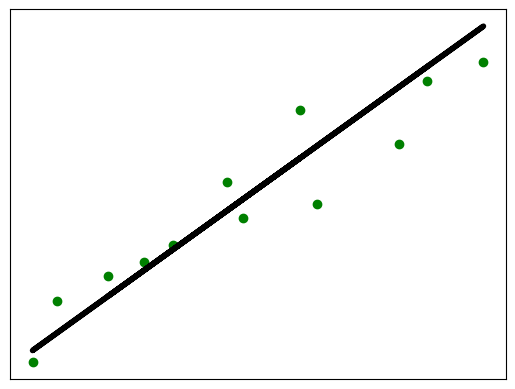

In [11]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

# Compute performance metrics

In [12]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


# Model persistence

In [13]:
output_model_file = 'model.pkl'

# Save the model

In [14]:
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

# Load the model

In [15]:
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Perform prediction on test data

In [16]:
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2))


New mean absolute error = 0.59
